In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
data = pd.read_csv(r"D:\Data\Deep_Learning\demo_data\8.twospirals.csv", header=None)

In [4]:
data.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [5]:
data.shape
data.info()

(2000, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [6]:
data.duplicated().value_counts()

False    2000
dtype: int64

In [7]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

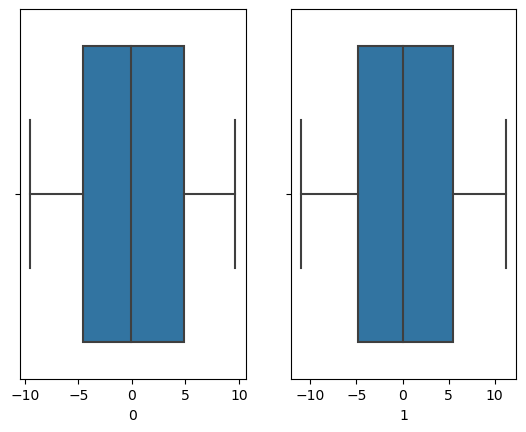

In [8]:
plt.subplot(121)
sns.boxplot(x=data[0])
plt.subplot(122)
sns.boxplot(x=data[1]);

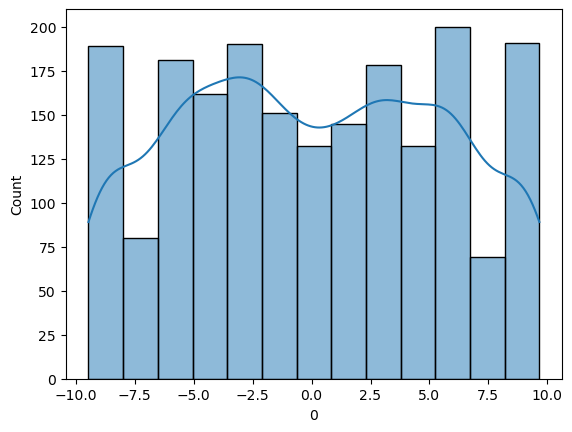

In [9]:
sns.histplot(data[0], kde=True);

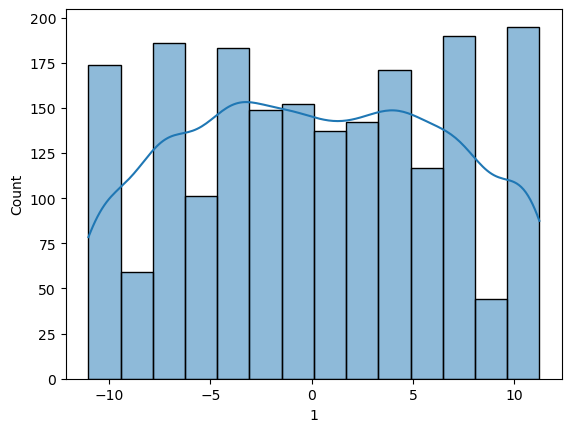

In [10]:
sns.histplot(data[1],kde=True);

In [11]:
data[2].value_counts()

0    1000
1    1000
Name: 2, dtype: int64

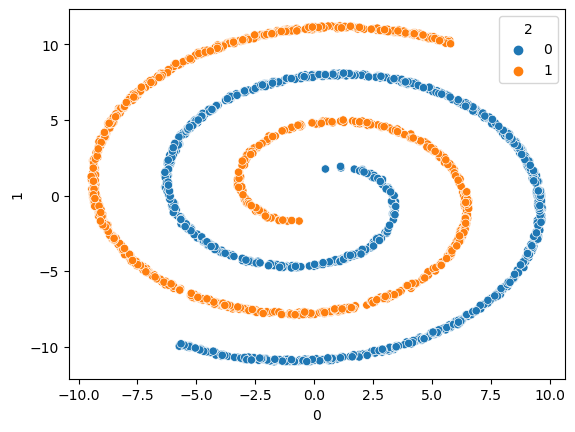

In [12]:
sns.scatterplot(x=data[0], y=data[1], hue=data[2]);

## Splitting the data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[[0,1]],data[2],test_size=0.1)

### Rescaling the features

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [15]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Buliding the model using sigmoid

In [16]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim = 2))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.get_weights()

[array([[-0.76583457,  0.99443054,  0.1768167 , -0.91360855],
        [ 0.114995  , -0.55514383,  0.34067798,  0.8654864 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.50477755, -0.81203943,  0.21506011],
        [ 0.49418592, -0.17966187,  0.30339253],
        [-0.48009762, -0.6522336 , -0.32026863],
        [ 0.35988832, -0.19416022,  0.21059382]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.20536804, -0.61492515],
        [-1.0648459 , -0.07576025],
        [-0.18712914, -0.12099642]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.71868706],
        [ 1.0008825 ]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='SGD',loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
144/144 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.4924 - val_loss: 0.6937 - val_accuracy: 0.5167
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4750 - val_loss: 0.6941 - val_accuracy: 0.4056
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.3840 - val_loss: 0.6943 - val_accuracy: 0.4361
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4639 - val_loss: 0.6945 - val_accuracy: 0.4833
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4951 - val_loss: 0.6945 - val_accuracy: 0.4833
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5014 - val_loss: 0.6945 - val_accuracy: 0.4833
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4694 - val_loss: 0.6945 - val_accuracy: 0.4833
Epoch 

In [21]:
y_pred = model.predict(x_test_trans)
y_pred

7/7 [==============================] - 0s 1ms/step


array([[0.4927665 ],
       [0.49163038],
       [0.492168  ],
       [0.49273232],
       [0.49251923],
       [0.49285033],
       [0.49275804],
       [0.4917673 ],
       [0.49166074],
       [0.49242398],
       [0.49321035],
       [0.49213558],
       [0.49161944],
       [0.49290606],
       [0.4927409 ],
       [0.49263966],
       [0.49263138],
       [0.492     ],
       [0.49129856],
       [0.49255842],
       [0.49290955],
       [0.4934523 ],
       [0.49286756],
       [0.4913583 ],
       [0.4913244 ],
       [0.49363887],
       [0.49170133],
       [0.49241498],
       [0.4931534 ],
       [0.49246028],
       [0.49258578],
       [0.49338442],
       [0.4917931 ],
       [0.49165642],
       [0.49254155],
       [0.49133673],
       [0.49351743],
       [0.49201122],
       [0.49270484],
       [0.49317324],
       [0.49164048],
       [0.49230817],
       [0.49254274],
       [0.49198318],
       [0.4935688 ],
       [0.49340096],
       [0.49363133],
       [0.492

In [22]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.475

In [24]:
val_loss = history.history['val_loss']
loss = history.history['loss']

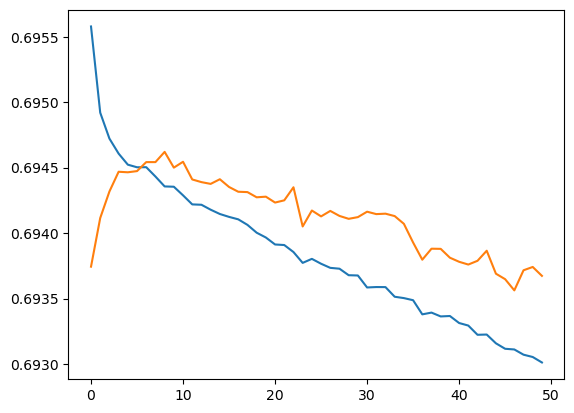

In [25]:
plt.plot(loss)
plt.plot(val_loss)

In [26]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 9s 917us/step


<AxesSubplot: >

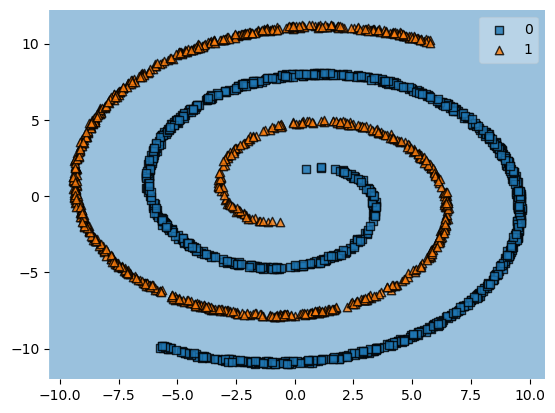

In [27]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 925us/step


<AxesSubplot: >

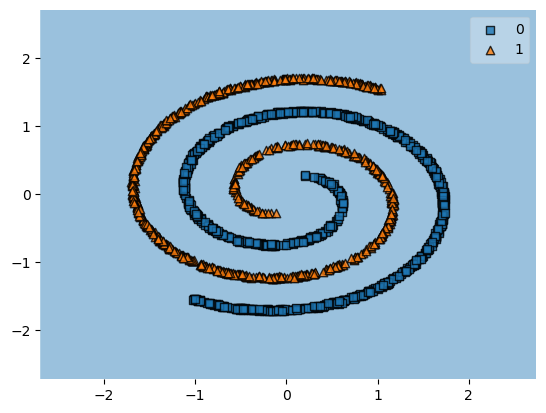

In [28]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

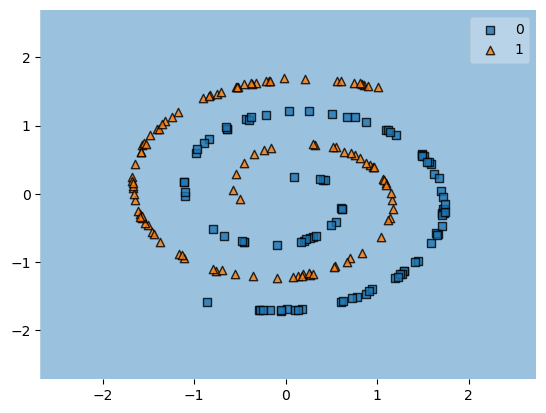

In [29]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the tanh activation func

In [30]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim = 2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [31]:
model.get_weights()

[array([[ 0.4879583 , -0.76346105,  0.76763046],
        [-0.54476005, -0.11144549, -0.32128507]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.55566406,  0.8245821 ],
        [ 0.37122214,  0.2873943 ],
        [-0.06223893, -0.38644314]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.7822492 ],
        [ 0.71669567]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
144/144 [==============================] - 1s 3ms/step - loss: 1.5164 - accuracy: 0.5076 - val_loss: 1.1068 - val_accuracy: 0.4833
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.9622 - accuracy: 0.5076 - val_loss: 0.9242 - val_accuracy: 0.4833
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.5076 - val_loss: 0.8272 - val_accuracy: 0.4833
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7615 - accuracy: 0.5076 - val_loss: 0.7680 - val_accuracy: 0.4833
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.5076 - val_loss: 0.7283 - val_accuracy: 0.4833
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5076 - val_loss: 0.7024 - val_accuracy: 0.4833
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.5799 - val_loss: 0.6849 - val_accuracy: 0.5500
Epoch 

In [35]:
#SGD
y_pred = model.predict(x_test_trans)
y_pred

7/7 [==============================] - 0s 1ms/step


array([[ 0.22691303],
       [ 0.34871715],
       [ 0.73815185],
       [ 0.14919353],
       [ 0.3719706 ],
       [ 0.6184011 ],
       [ 0.21130495],
       [ 0.4621987 ],
       [ 0.36588848],
       [ 0.7928918 ],
       [ 0.6879519 ],
       [ 0.72401935],
       [ 0.34140012],
       [ 0.6339527 ],
       [ 0.560243  ],
       [ 0.03365732],
       [ 0.78256446],
       [ 0.45773286],
       [ 0.26559508],
       [-0.00826402],
       [ 0.6515217 ],
       [ 0.64266086],
       [ 0.55876577],
       [ 0.27076516],
       [ 0.25687456],
       [ 0.72010535],
       [ 0.39233625],
       [ 0.3017158 ],
       [ 0.69994324],
       [-0.02818925],
       [-0.01797247],
       [ 0.59085983],
       [ 0.47719485],
       [ 0.36088905],
       [ 0.79005456],
       [ 0.26251796],
       [ 0.658152  ],
       [ 0.42525822],
       [ 0.77303183],
       [ 0.6110009 ],
       [ 0.3551881 ],
       [ 0.7855985 ],
       [ 0.3970295 ],
       [ 0.45207134],
       [ 0.67104036],
       [ 0

In [36]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.715

In [38]:
val_loss = history.history['val_loss']
loss = history.history['loss']

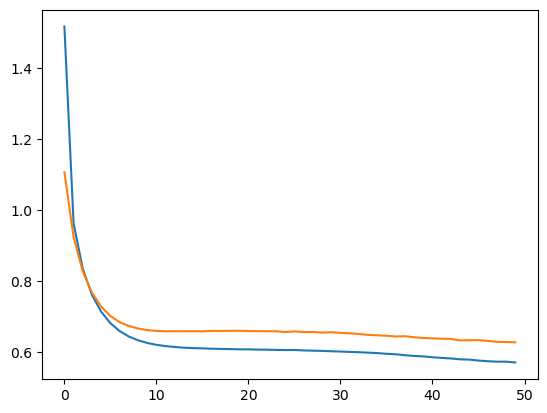

In [39]:
plt.plot(loss)
plt.plot(val_loss)

In [40]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

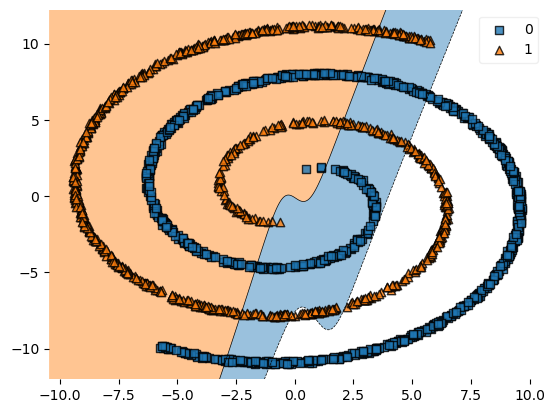

In [41]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

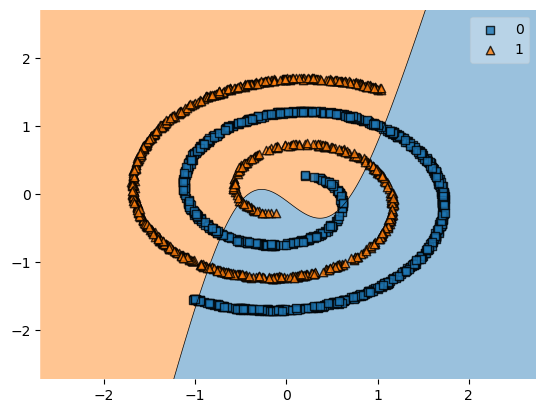

In [42]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 9s 954us/step


<AxesSubplot: >

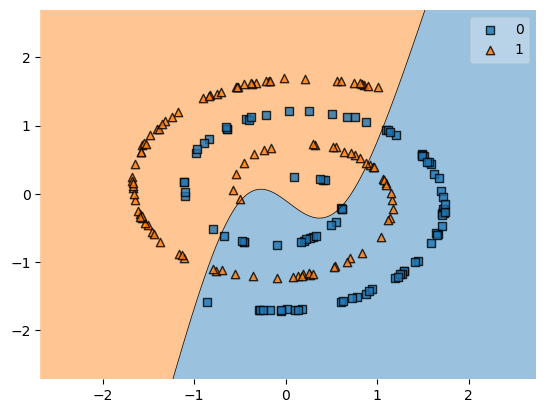

In [43]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the Relu activation func

In [44]:
model=Sequential()
model.add(Dense(5,activation="relu", input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="tanh"))

In [45]:
model.get_weights()

[array([[-0.30163258, -0.8385345 , -0.415532  , -0.6981798 ,  0.45153522],
        [-0.13828903, -0.46267718,  0.00960827,  0.29205716,  0.4242648 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.7376466 , -0.7299336 ,  0.72911465,  0.25602686],
        [ 0.56577885,  0.01155007, -0.62632585,  0.07048637],
        [-0.79018974, -0.54753304, -0.59323156,  0.07979244],
        [ 0.34988046,  0.37725544, -0.71399164,  0.07902038],
        [ 0.06806237, -0.00444388,  0.7723124 ,  0.79381084]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.32624245, -0.3188889 ],
        [-0.5346439 , -0.9914746 ],
        [-0.8418286 , -0.2549684 ],
        [-0.45402288, -0.34935498]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.03117549],
        [1.2959529 ]], dtype=float32),
 array([0.], dtype=float32)]

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 15        
                                                                 
 dense_8 (Dense)             (None, 4)                 24        
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
144/144 [==============================] - 1s 2ms/step - loss: 1.6731 - accuracy: 0.5076 - val_loss: 1.3507 - val_accuracy: 0.4833
Epoch 2/50
144/144 [==============================] - 0s 1ms/step - loss: 1.0681 - accuracy: 0.5076 - val_loss: 0.8907 - val_accuracy: 0.4833
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.7427 - accuracy: 0.5771 - val_loss: 0.7044 - val_accuracy: 0.5444
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6097 - val_loss: 0.6648 - val_accuracy: 0.5806
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6424 - val_loss: 0.6554 - val_accuracy: 0.5861
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6493 - val_loss: 0.6510 - val_accuracy: 0.5972
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.6542 - val_loss: 0.6473 - val_accuracy: 0.6083
Epoch 

In [49]:
y_pred = model.predict(x_test_trans)
y_pred

7/7 [==============================] - 0s 1ms/step


array([[-0.03176726],
       [ 0.4439598 ],
       [ 0.8047039 ],
       [-0.03176726],
       [ 0.7765323 ],
       [ 0.62924415],
       [-0.03176726],
       [ 0.6303947 ],
       [ 0.4015348 ],
       [ 0.8184032 ],
       [ 0.6899117 ],
       [ 0.79870975],
       [ 0.45885274],
       [ 0.5458516 ],
       [ 0.69486696],
       [-0.03176726],
       [ 0.80343413],
       [ 0.3653347 ],
       [-0.03176726],
       [-0.03176726],
       [ 0.65958494],
       [ 0.8240704 ],
       [ 0.55880183],
       [-0.03176726],
       [-0.03176726],
       [ 0.6622014 ],
       [ 0.577417  ],
       [ 0.7802611 ],
       [ 0.69016   ],
       [-0.03176726],
       [-0.03176726],
       [ 0.8051394 ],
       [ 0.6660789 ],
       [ 0.42252994],
       [ 0.8129328 ],
       [-0.03176726],
       [ 0.68212706],
       [ 0.557031  ],
       [ 0.7923114 ],
       [ 0.6284999 ],
       [ 0.43009093],
       [ 0.821441  ],
       [ 0.77020997],
       [ 0.36050105],
       [ 0.6772261 ],
       [ 0

In [50]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.795

In [52]:
val_loss = history.history['val_loss']
loss = history.history['loss']

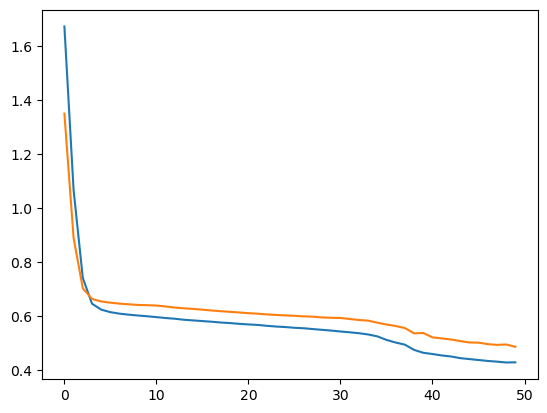

In [53]:
plt.plot(loss)
plt.plot(val_loss)

In [54]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 9s 963us/step


<AxesSubplot: >

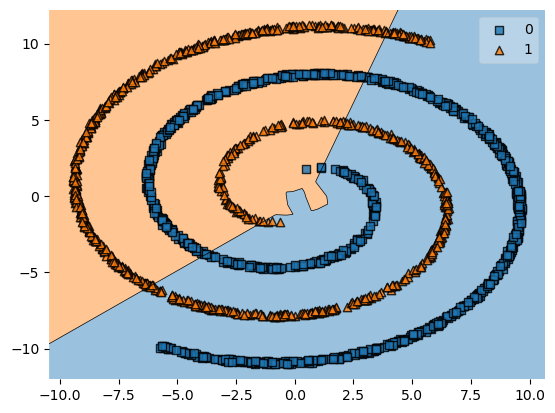

In [55]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

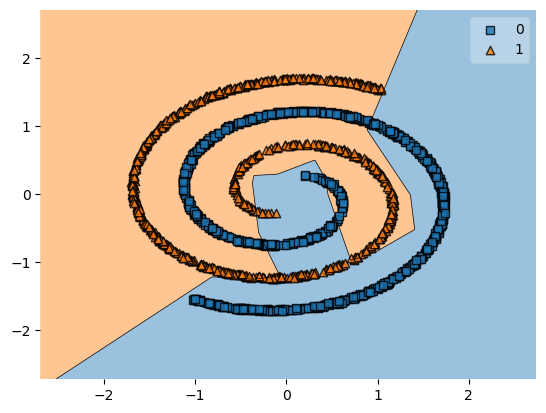

In [56]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

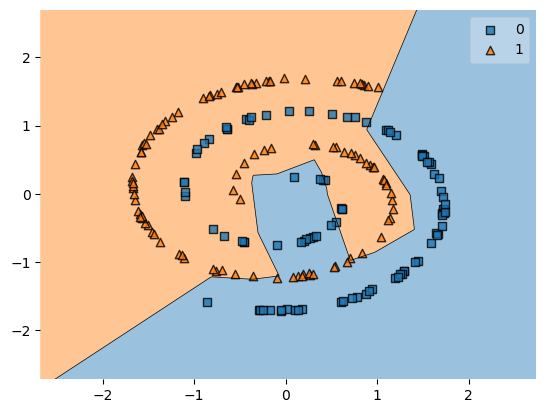

In [57]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### buliding the model with relu func

In [58]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="relu"))

In [59]:
model.get_weights()

[array([[-0.9174369 , -0.21295983, -0.41688466,  0.7988926 ,  0.31193435],
        [ 0.8980727 , -0.8201174 ,  0.36002672, -0.78049386,  0.20454776]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.65737283,  0.61194384,  0.01375896,  0.78984225],
        [ 0.60190356,  0.58800995,  0.24139464, -0.16212338],
        [-0.50912404, -0.5370628 , -0.5088444 , -0.44737813],
        [ 0.22290063,  0.52584004, -0.11218673,  0.3597238 ],
        [ 0.7565032 ,  0.4517504 , -0.50489163,  0.53242695]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.8756666 ,  0.70696163],
        [-0.35793948, -0.00693488],
        [-0.04203153,  0.78354335],
        [-0.3417623 ,  0.9148655 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.0483495 ],
        [-0.81368876]], dtype=float32),
 array([0.], dtype=float32)]

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 15        
                                                                 
 dense_12 (Dense)            (None, 4)                 24        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
144/144 [==============================] - 1s 3ms/step - loss: 7.5946 - accuracy: 0.5076 - val_loss: 7.9696 - val_accuracy: 0.4833
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 7.5946 - accuracy: 0.5076 - val_loss: 7.9696 - val_accuracy: 0.4833
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 7.5946 - accuracy: 0.5076 - val_loss: 7.9696 - val_accuracy: 0.4833
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 7.5946 - accuracy: 0.5076 - val_loss: 7.9696 - val_accuracy: 0.4833
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 7.5946 - accuracy: 0.5076 - val_loss: 7.9696 - val_accuracy: 0.4833
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 7.5946 - accuracy: 0.5076 - val_loss: 7.9696 - val_accuracy: 0.4833
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 7.5946 - accuracy: 0.5076 - val_loss: 7.9696 - val_accuracy: 0.4833
Epoch 

In [63]:
y_pred = model.predict(x_test_trans)
y_pred

7/7 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [64]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.475

In [66]:
val_loss = history.history['val_loss']
loss = history.history['loss']

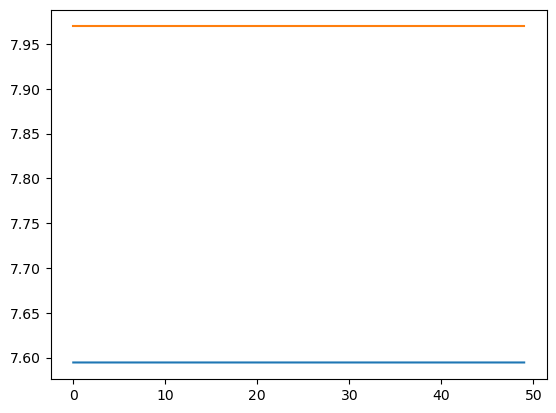

In [67]:
plt.plot(loss)
plt.plot(val_loss)

In [68]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

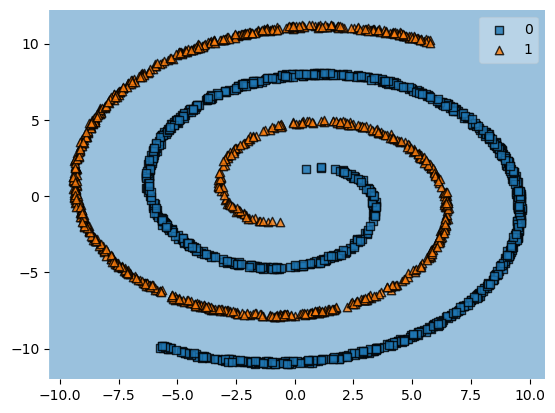

In [69]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 11s 1ms/step


<AxesSubplot: >

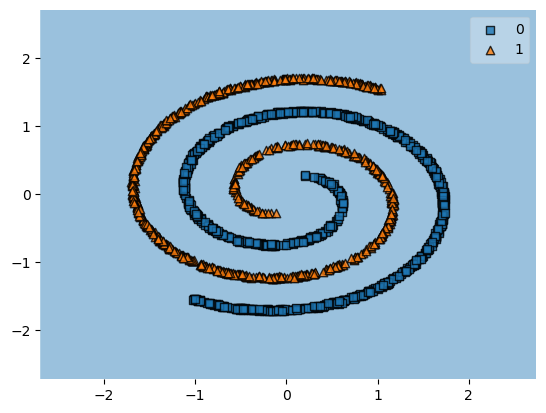

In [70]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 11s 1ms/step


<AxesSubplot: >

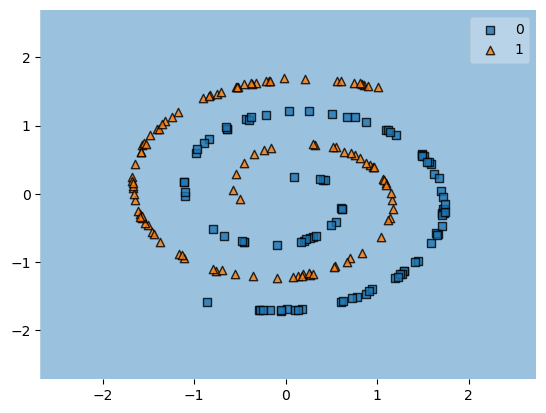

In [71]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

## relu and sigmoid

In [72]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [73]:
model.get_weights()

[array([[-0.46996555,  0.20256114, -0.2141127 , -0.5319056 ,  0.86367464],
        [-0.91610056, -0.6248455 , -0.3739488 ,  0.82086635,  0.21835768]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.7264999 , -0.6233167 , -0.44658038,  0.11060292],
        [ 0.7156662 ,  0.11541355,  0.00073797, -0.18286872],
        [-0.13954735,  0.2753775 ,  0.40018845,  0.55520487],
        [-0.5452416 , -0.54063904, -0.56478274, -0.2717082 ],
        [ 0.15149003,  0.47193897,  0.24066448, -0.61997306]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.46937418,  0.29746628],
        [ 0.42040133,  0.17550111],
        [-0.00482464,  0.31687927],
        [-0.61384654,  0.68574643]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.55344677],
        [-0.0932467 ]], dtype=float32),
 array([0.], dtype=float32)]

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 dense_16 (Dense)            (None, 4)                 24        
                                                                 
 dense_17 (Dense)            (None, 2)                 10        
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='Rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
144/144 [==============================] - 1s 3ms/step - loss: 0.6620 - accuracy: 0.6181 - val_loss: 0.6754 - val_accuracy: 0.5667
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6444 - val_loss: 0.6705 - val_accuracy: 0.5833
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.6583 - val_loss: 0.6665 - val_accuracy: 0.5889
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6653 - val_loss: 0.6631 - val_accuracy: 0.5972
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6681 - val_loss: 0.6599 - val_accuracy: 0.5917
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6701 - val_loss: 0.6602 - val_accuracy: 0.5917
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6715 - val_loss: 0.6568 - val_accuracy: 0.6000
Epoch 

In [77]:
y_pred = model.predict(x_test_trans)
y_pred

7/7 [==============================] - 0s 1ms/step


array([[0.06853453],
       [0.5319934 ],
       [0.70947355],
       [0.06427231],
       [0.4491413 ],
       [0.6176104 ],
       [0.06779877],
       [0.6370443 ],
       [0.50958925],
       [0.70947355],
       [0.70947355],
       [0.70947355],
       [0.5337093 ],
       [0.70947355],
       [0.43402317],
       [0.07717752],
       [0.70947355],
       [0.16535886],
       [0.08076409],
       [0.111754  ],
       [0.70947355],
       [0.70947355],
       [0.70947355],
       [0.03909641],
       [0.05122794],
       [0.70947355],
       [0.6333618 ],
       [0.50830805],
       [0.70947355],
       [0.11622881],
       [0.09479889],
       [0.6418896 ],
       [0.6641929 ],
       [0.5589741 ],
       [0.70947355],
       [0.0434068 ],
       [0.70947355],
       [0.09014998],
       [0.70947355],
       [0.70947355],
       [0.5279119 ],
       [0.70947355],
       [0.45013323],
       [0.15063629],
       [0.70947355],
       [0.70947355],
       [0.70947355],
       [0.709

In [78]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.83

In [80]:
val_loss = history.history['val_loss']
loss = history.history['loss']

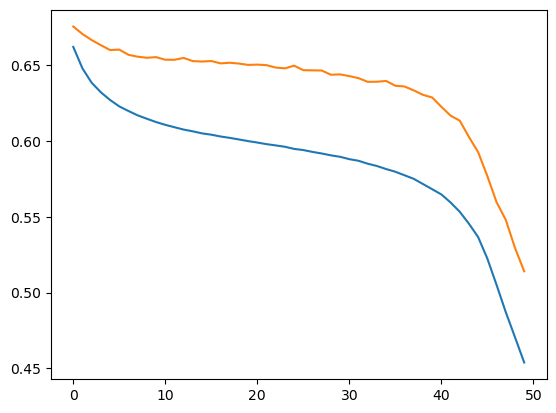

In [81]:
plt.plot(loss)
plt.plot(val_loss)

In [82]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

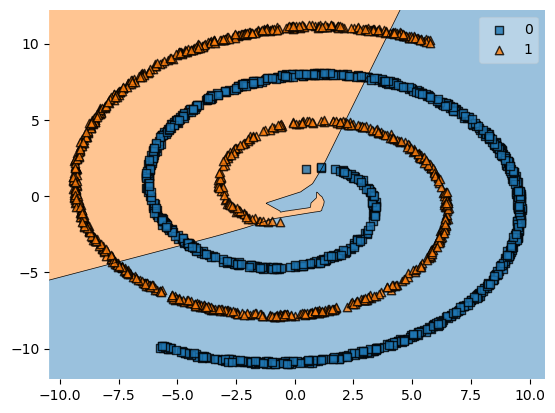

In [83]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 10s 997us/step


<AxesSubplot: >

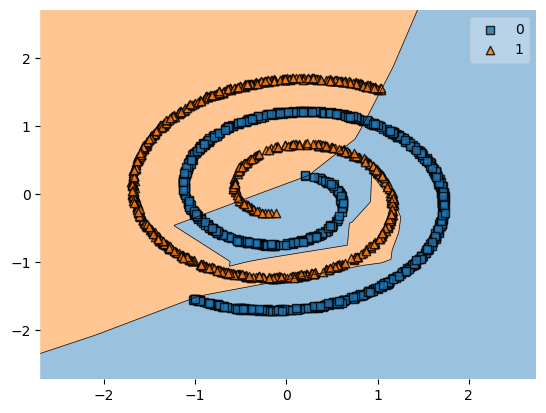

In [84]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 9s 979us/step


<AxesSubplot: >

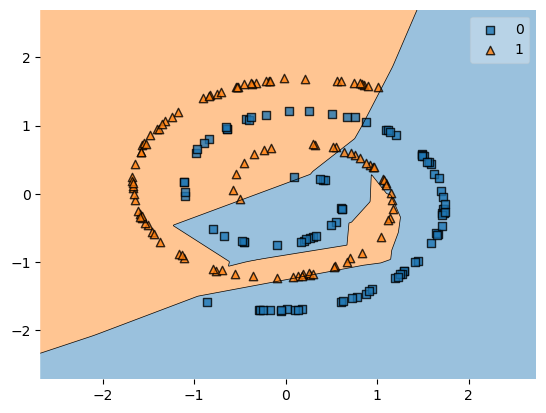

In [85]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)